In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split, cross_val_score
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Vera/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('data.csv', index_col=0)

In [3]:
data_X = data.ix[:, data.columns != 'imdb_rating']
data_Y = data['imdb_rating']

In [4]:
# means, stds = np.mean(data_X), np.std(data_X)
# train_data_X = (data_X-means)/stds

In [5]:
train_X,test_X = train_test_split(data_X, test_size=0.2, random_state=42)
train_y,test_y = train_test_split(data_Y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(train_X, train_y)
scaled_train_data = scaler.transform(train_X)
scaled_test_data = scaler.transform(test_X)

In [7]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [8]:
lr = LinearRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [9]:
lscoring_sqrt = cross_val_score(lr, data_X, data_Y, scoring='neg_mean_squared_error', cv=10)
print ('mean absolute error:', mean_absolute_error(test_y, predictions))
print ('mean_squared_error', mean_squared_error(test_y, predictions))
print('среднее значение:', lscoring_sqrt.mean()*(-1))
print('отклонение:', lscoring_sqrt.std())
print ('коефициент детерминации', r2_score(test_y, predictions))

mean absolute error: 0.318884874557
mean_squared_error 0.16694938465
среднее значение: 0.233677308885
отклонение: 0.201735661644
коефициент детерминации 0.656827438486


In [10]:
list(zip(data_X.columns, lr.coef_))

[('num_characters', 0.002026422795574702),
 ('words_count', 7.3934075680725115e-05),
 ('num_locations', -0.0016799446330193954),
 ('us_viewers_in_millions', 0.0080438684065662278),
 ('views', 7.9783161643379934e-06),
 ('imdb_votes', 0.0010917709376312701),
 ('main_character_Bart Simpson', 0.030513874935558811),
 ('main_character_Else', -0.0036118044023494555),
 ('main_character_Homer Simpson', -0.010735782250618652),
 ('main_character_Lisa Simpson', 0.030049147895135402),
 ('main_character_Marge Simpson', -0.046215436177726048),
 ('main_location_Elsewhere', -0.067644623718438643),
 ("main_location_Moe's Tavern", -0.059274055692979742),
 ('main_location_Simpson Home', -0.054741185860502237),
 ('main_location_Springfield Elementary School', 0.020057823727325987),
 ('main_location_Springfield Nuclear Power Plant', 0.16160204154459459)]

In [11]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(random_state=3)
lasso.fit(data_X, data_Y)
lscoring = cross_val_score(lasso, data_X, data_Y, scoring='neg_mean_absolute_error', cv=10)
lscoring = cross_val_score(lasso, data_X, data_Y, scoring='neg_mean_absolute_error', cv=10)

print('среднее значение:', lscoring.mean()*(-1))
print('отклонение:', lscoring.std())
list(zip(data_X.columns, lasso.coef_))

среднее значение: 0.318861004575
отклонение: 0.0728406398839


[('num_characters', 0.0),
 ('words_count', 7.0330981749950784e-05),
 ('num_locations', -0.0),
 ('us_viewers_in_millions', 0.0),
 ('views', 7.2450311657801253e-06),
 ('imdb_votes', 0.0012517647505969239),
 ('main_character_Bart Simpson', 0.0),
 ('main_character_Else', -0.0),
 ('main_character_Homer Simpson', 0.0),
 ('main_character_Lisa Simpson', 0.0),
 ('main_character_Marge Simpson', -0.0),
 ('main_location_Elsewhere', -0.0),
 ("main_location_Moe's Tavern", -0.0),
 ('main_location_Simpson Home', 0.0),
 ('main_location_Springfield Elementary School', 0.0),
 ('main_location_Springfield Nuclear Power Plant', 0.0)]

In [12]:
ridge = Ridge(random_state=3)
ridge.fit(data_X, data_Y)
lscoring = cross_val_score(ridge, data_X, data_Y, scoring='neg_mean_absolute_error', cv=10)
print('среднее значение:', lscoring.mean()*(-1))
print('отклонение:', lscoring.std())
list(zip(data_X.columns, ridge.coef_))

среднее значение: 0.32344278199
отклонение: 0.0677165291913


[('num_characters', 0.0039589713201627786),
 ('words_count', 3.9692896544375373e-05),
 ('num_locations', -0.0023147670031634341),
 ('us_viewers_in_millions', 0.0015827973639367752),
 ('views', 6.6819430702411978e-06),
 ('imdb_votes', 0.0012529119988882152),
 ('main_character_Bart Simpson', 0.021611606300631022),
 ('main_character_Else', 0.015559396976675891),
 ('main_character_Homer Simpson', 0.023730591253862988),
 ('main_character_Lisa Simpson', 0.017911428214936135),
 ('main_character_Marge Simpson', -0.078813022746092823),
 ('main_location_Elsewhere', -0.071988159648299424),
 ("main_location_Moe's Tavern", -0.046852644298001532),
 ('main_location_Simpson Home', -0.04235985714173858),
 ('main_location_Springfield Elementary School', 0.045323331013575788),
 ('main_location_Springfield Nuclear Power Plant', 0.11587733007445844)]

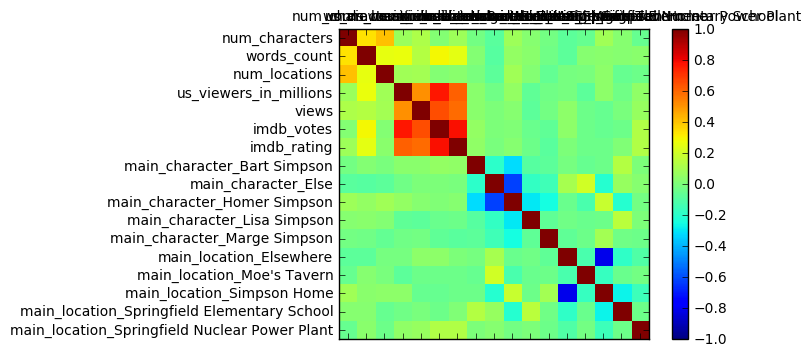

In [13]:
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.keys()),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.keys())
ax.set_yticklabels(data.keys())
plt.show()

In [39]:
regressor = SGDRegressor(random_state=42, penalty='l1')

In [40]:
regressor.fit(scaled_train_data,train_y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l1', power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=False)

In [41]:
mean_absolute_error(test_y, regressor.predict(scaled_test_data))

0.37001923085904392

In [17]:
regressor.coef_

array([-0.01421096,  0.05284878, -0.00998514,  0.13089763,  0.17018179,
        0.30763222,  0.01318711, -0.003688  , -0.00477014,  0.01592232,
       -0.01933345, -0.00495632,  0.00606515, -0.016464  ,  0.01583067,
        0.04037137])

In [18]:
scaler = StandardScaler()
train_X_drop = train_X.drop(['views', 'us_viewers_in_millions', 'imdb_votes'], axis = 1)
test_X_drop = test_X.drop(['views', 'us_viewers_in_millions', 'imdb_votes'], axis = 1)
scaler.fit(train_X_drop, train_y)
scaled_train_data_drop = scaler.transform(train_X_drop)
scaled_test_data_drop = scaler.transform(test_X_drop)

In [19]:
regressor2 = SGDRegressor(random_state=42)
regressor2.fit(scaled_train_data_drop,train_y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=False)

In [20]:
mean_absolute_error(test_y, regressor2.predict(scaled_test_data_drop))

0.53587264271144164

In [21]:
regressor2.coef_

array([-0.01098932,  0.20036118, -0.00428344,  0.02517406,  0.00169992,
        0.01687263, -0.02049527, -0.05007762,  0.01238511, -0.03099073,
       -0.02977181, -0.00034056,  0.09659353])

In [22]:
scaler = StandardScaler()
train_X_drop = train_X[['views', 'us_viewers_in_millions', 'imdb_votes']]
test_X_drop = test_X[['views', 'us_viewers_in_millions', 'imdb_votes']]
scaler.fit(train_X_drop, train_y)
scaled_train_data_drop_2 = scaler.transform(train_X_drop)
scaled_test_data_drop_2 = scaler.transform(test_X_drop)

In [23]:
regressor3 = SGDRegressor(random_state=42)
regressor3.fit(scaled_train_data_drop_2,train_y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=False)

In [24]:
mean_absolute_error(test_y, regressor3.predict(scaled_test_data_drop_2))

0.36699869712690936

In [25]:
regressor3.coef_

array([ 0.15099403,  0.13041102,  0.34241488])

In [26]:
from sklearn.pipeline import Pipeline
from sklearn import cross_validation, grid_search, linear_model, metrics


/Users/Vera/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [27]:
#создаем pipeline из двух шагов: scaling и классификация
pipeline = Pipeline(steps = [('scaling', scaler), ('regression', regressor)])

In [28]:
pipeline.fit(train_X, train_y)
mean_absolute_error(test_y, pipeline.predict(test_X))

0.37005419857892458

In [29]:
pipeline.get_params().keys()

dict_keys(['regression__n_iter', 'regression__verbose', 'regression__fit_intercept', 'regression', 'scaling__with_std', 'scaling', 'regression__shuffle', 'regression__alpha', 'regression__loss', 'regression__eta0', 'regression__penalty', 'scaling__copy', 'regression__average', 'scaling__with_mean', 'steps', 'regression__learning_rate', 'regression__epsilon', 'regression__random_state', 'regression__power_t', 'regression__l1_ratio', 'regression__warm_start'])

In [30]:
parameters_grid = {
    'regression__loss' : ['huber', 'epsilon_insensitive', 'squared_loss', ],
    'regression__n_iter' : [3, 5, 10, 50], 
    'regression__penalty' : ['l1', 'l2', 'none'],
    'regression__alpha' : [0.0001, 0.01],
    'scaling__with_mean' : [0., 0.5],
}

In [31]:
grid_cv = grid_search.GridSearchCV(pipeline, parameters_grid, scoring = 'neg_mean_absolute_error', cv = 4)

In [32]:
%%time
grid_cv.fit(train_X, train_y)

CPU times: user 3.04 s, sys: 18.4 ms, total: 3.06 s
Wall time: 3.07 s


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'regression__penalty': ['l1', 'l2', 'none'], 'scaling__with_mean': [0.0, 0.5], 'regression__alpha': [0.0001, 0.01], 'regression__n_iter': [3, 5, 10, 50], 'regression__loss': ['huber', 'epsilon_insensitive', 'squared_loss']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [33]:
print (grid_cv.best_score_)
print (grid_cv.best_params_)

-0.29989828287710124
{'regression__n_iter': 50, 'regression__penalty': 'l1', 'scaling__with_mean': 0.5, 'regression__alpha': 0.01, 'regression__loss': 'epsilon_insensitive'}


In [34]:
metrics.mean_absolute_error(test_y, grid_cv.best_estimator_.predict(test_X))

0.28459318462635047

In [35]:
np.mean(test_y)

7.435087719298247

In [36]:
test_predictions = grid_cv.best_estimator_.predict(test_X)

In [37]:
test_predictions

array([ 8.03505446,  7.58140475,  6.99562184,  7.01448805,  7.30774359,
        7.01993176,  6.84253424,  8.35660062,  7.33867049,  8.44997713,
        6.70527977,  7.61899735,  7.12582154,  7.94623224,  7.09105481,
        7.37266385,  8.11552911,  6.95683846,  7.18615694,  7.91270124,
        7.66624   ,  7.13685828,  7.03132015,  6.85030956,  7.89383098,
        8.0229667 ,  6.77939199,  7.14319855,  8.81766211,  7.41063677,
        7.37455284,  7.13071357,  7.74988652,  7.39576412,  8.1130261 ,
        8.46947146,  8.82830315,  6.78282031,  8.18268102,  7.2693191 ,
        7.16881199,  7.00765187,  6.95036598,  6.73559731,  6.97185644,
        7.01575305,  7.16179826,  6.90974001,  6.91702085,  8.19545561,
        6.98826466,  8.52614778,  6.98496478,  6.95651562,  7.44382639,
        7.35301391,  8.34463924,  7.71261529,  8.23090032,  7.07537598,
        7.42853496,  8.61981853,  7.02324548,  6.97693787,  6.85713628,
        7.84803153,  6.96045818,  7.51580397,  9.51451565,  6.85

(4, 12)

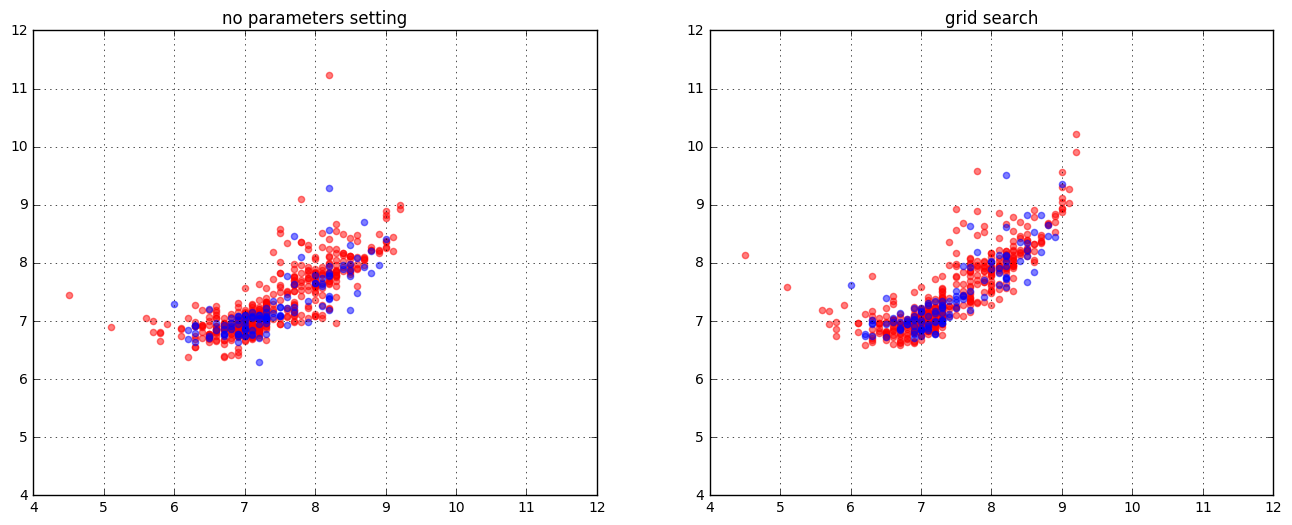

In [42]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(train_y, pipeline.predict(train_X), alpha=0.5, color = 'red')
pylab.scatter(test_y, pipeline.predict(test_X), alpha=0.5, color = 'blue')
pylab.title('no parameters setting')
pylab.xlim(4,12)
pylab.ylim(4,12)

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.scatter(train_y, grid_cv.best_estimator_.predict(train_X), alpha=0.5, color = 'red')
pylab.scatter(test_y, grid_cv.best_estimator_.predict(test_X), alpha=0.5, color = 'blue')
pylab.title('grid search')
pylab.xlim(4,12)
pylab.ylim(4,12)

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
regressor = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 50)

In [46]:
regressor.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [48]:
mean_absolute_error(test_y, regressor.predict(test_X))

0.25997767145135575

(4, 12)

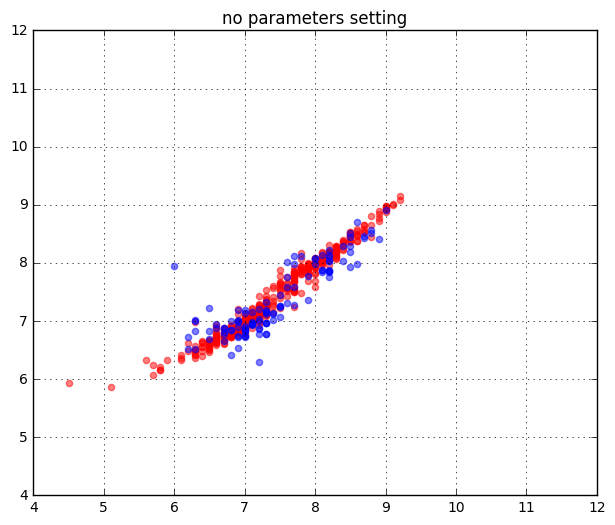

In [49]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(train_y, regressor.predict(train_X), alpha=0.5, color = 'red')
pylab.scatter(test_y, regressor.predict(test_X), alpha=0.5, color = 'blue')
pylab.title('no parameters setting')
pylab.xlim(4,12)
pylab.ylim(4,12)
